# Linear Regression

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv('headbrain.csv')

In [154]:
data.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [155]:
data.shape

(237, 4)

In [156]:
data.columns

Index([u'Gender', u'Age Range', u'Head Size(cm^3)', u'Brain Weight(grams)'], dtype='object')

collecting x and y values

In [157]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [158]:
x

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

### mean calculation

In [159]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [160]:
x_mean

3633.9915611814345

In [161]:
y_mean

1282.873417721519

### total number of values

In [162]:
n = len(x)

In [163]:
n

237

In [164]:
np.power(2,4)

16

### using the formula to calculate b0 (slope) and b1(intercept)

In [165]:
up = 0
down = 0
sum = 0
square_sum = 0
for i in range(n):
    x_diff = x[i] - x_mean
    y_diff = y[i] - y_mean
    sum = sum + (x_diff * y_diff)
    square_sum = square_sum + np.power(x_diff,2)

slope = sum / square_sum
print(slope)

0.26342933948939945


### to find intercept

In [166]:
#y=mx+c
#c=y-mx

intercept = y[0] - slope * x[0]
intercept1 = y_mean - slope * x_mean
print(intercept)
print(intercept1)

341.40682022382975
325.57342104944223


In [167]:
print('slope is:',slope,'intercept is:',intercept1)

('slope is:', 0.26342933948939945, 'intercept is:', 325.57342104944223)


### Our line of best fit is:

### y=mx+c
brainWeight = slope * headSize + intercept

brainWeight = 0.26342933948939945 * headSize + 325.57342104944223 

In [168]:
bw = 0.26342933948939945 * 3777 + 325.57342104944223
bw

1320.546036300904

# plotting

In [169]:
max_x = np.max(x) + 100
min_x = np.min(x) - 100

In [179]:
print(max_x)
print(min_x)

4847
2620


In [172]:
x1 = np.linspace(min_x,max_x,1000)
y1 = intercept + slope * x1

<function matplotlib.pyplot.show>

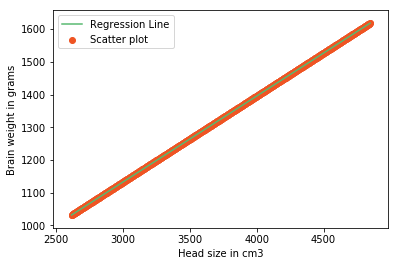

In [173]:
plt.plot(x1,y1,color='#58b970',label = 'Regression Line')
plt.scatter(x1,y1,color='#ef5423',label='Scatter plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show

### predicting score of model

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [175]:
x = x.reshape((n,1))
reg = LinearRegression()

In [176]:
reg = reg.fit(x,y)

In [177]:
y_predict = reg.predict(x)
r2_score = reg.score(x,y)

In [178]:
r2_score

0.639311719957